# 1. Initialization

## Loading libraries

In [1]:
import os
import warnings
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

USE_COLAB = True

In [2]:
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

if USE_COLAB:
  # Mounting the drive
  from google.colab import drive

  drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
def read_file(filename):
    base_dir = "/content/drive/MyDrive/Datasets" if USE_COLAB else os.getcwd()
    file_dir = os.path.join(base_dir, filename)

    return pd.read_csv(file_dir)


In [4]:
df = read_file("food_inspections.csv")

# 2. Exploratory Data Analysis

In [5]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    153810 non-null  int64  
 1   DBA Name         153810 non-null  object 
 2   AKA Name         151267 non-null  object 
 3   License #        153795 non-null  float64
 4   Facility Type    149250 non-null  object 
 5   Risk             153744 non-null  object 
 6   Address          153810 non-null  object 
 7   City             153651 non-null  object 
 8   State            153802 non-null  object 
 9   Zip              153712 non-null  float64
 10  Inspection Date  153810 non-null  object 
 11  Inspection Type  153809 non-null  object 
 12  Results          153810 non-null  object 
 13  Violations       123012 non-null  object 
 14  Latitude         153266 non-null  float64
 15  Longitude        153266 non-null  float64
 16  Location         153266 non-null  obje

In [7]:
df.isna().sum()

Inspection ID          0
DBA Name               0
AKA Name            2543
License #             15
Facility Type       4560
Risk                  66
Address                0
City                 159
State                  8
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30798
Latitude             544
Longitude            544
Location             544
dtype: int64

In [8]:
df.nunique()

Inspection ID      153810
DBA Name            24685
AKA Name            23591
License #           32850
Facility Type         447
Risk                    4
Address             17017
City                   57
State                   1
Zip                   100
Inspection Date      1946
Inspection Type       108
Results                 7
Violations         121916
Latitude            15908
Longitude           15908
Location            15908
dtype: int64

In [9]:
df["City"].value_counts().head(10)

CHICAGO              153090
Chicago                 258
chicago                  77
CCHICAGO                 39
SCHAUMBURG               18
MAYWOOD                  14
ELK GROVE VILLAGE        12
CHicago                  10
SKOKIE                    8
INACTIVE                  8
Name: City, dtype: int64

In [10]:
df["Inspection Date"].str.match(
    r"^(0?[1-9]|1[012])(\/)(0?[1-9]|[12]\d|3[01])\2(\d{4})$" # US Date Format
).sum()

153810

In [11]:
df["Expected Location"] = df["Latitude"].dropna().round(7).astype(str) + "," + df["Longitude"].dropna().round(7).astype(str)
df["Rounded Location"] = df["Location"].dropna().astype(str).apply(lambda loc: ','.join(map(lambda coord: str(round(float(coord), 7)), re.sub(r'[\(\)]', '', loc).split(','))))

In [12]:
df.dropna()[df["Expected Location"] != df["Rounded Location"]].count()

Inspection ID        0
DBA Name             0
AKA Name             0
License #            0
Facility Type        0
Risk                 0
Address              0
City                 0
State                0
Zip                  0
Inspection Date      0
Inspection Type      0
Results              0
Violations           0
Latitude             0
Longitude            0
Location             0
Expected Location    0
Rounded Location     0
dtype: int64

In [13]:
df[df["Location"].isna()][['City', 'State', 'Zip']].isna().sum()

City      7
State     0
Zip      10
dtype: int64

In [14]:
df[(df["City"].isna()) | (df["Zip"].isna())]['Location'].isna().sum()

10

Inspection ID
Skew : -0.5


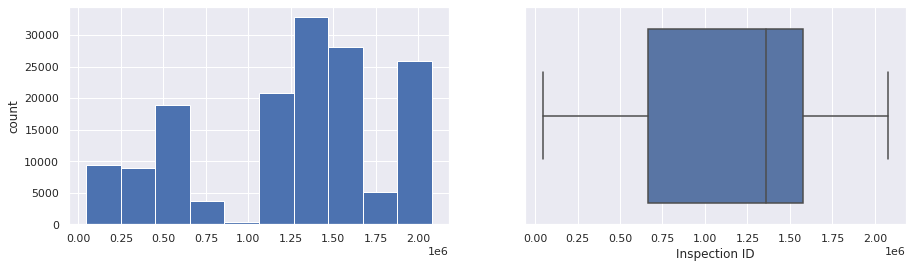

License #
Skew : -0.82


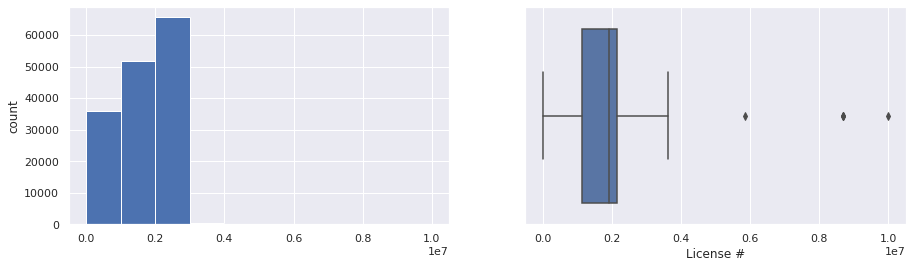

Zip
Skew : -5.39


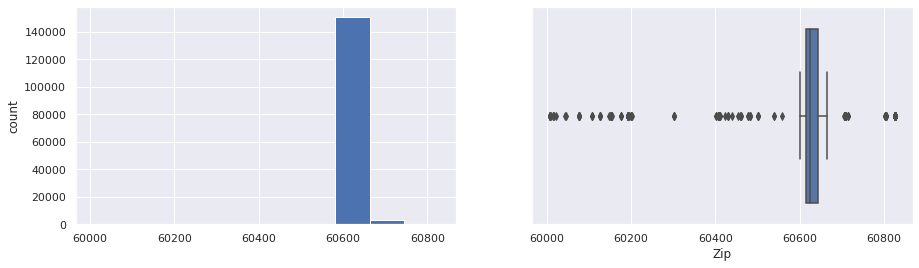

Latitude
Skew : -0.57


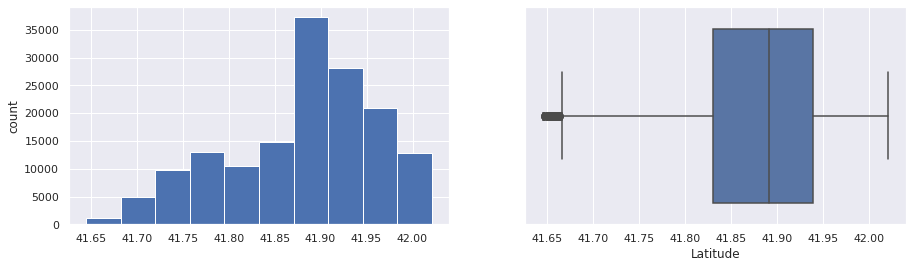

Longitude
Skew : -1.01


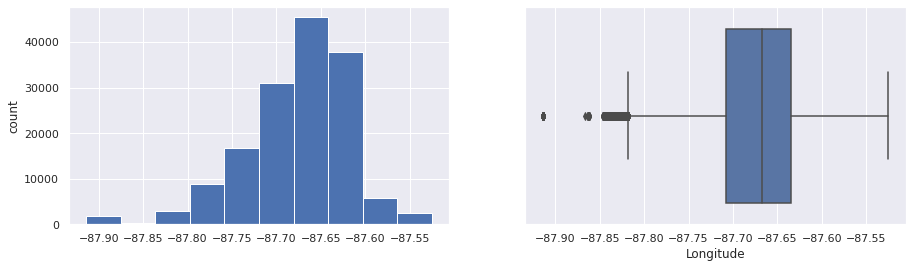

In [15]:
for col in df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns:
    print(col)
    print("Skew :", round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist()
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()